In [7]:
from MultiLayerPerceptron import train, Dense, predict_with_layer_value,mse, mse_derivative
from activation_functions import Sigmoid
from utils import *
from plots import *
from font import fontDict
import numpy as np

In [8]:
learning_rate, max_epochs, bias, beta1, beta2, epsilon, optimizer, activation = get_config_params('./config_denoising.json')
bitmapDict = fonts_to_bitmap(fontDict)
bitmapList = list(bitmapDict.values())
dataset = np.reshape(bitmapList, (len(bitmapList), 35, 1))

In [9]:
autoencoder = [
    Dense(35, 20, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(20, 10, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(10, 2, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(2, 10, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(10, 20, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(20, 35, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
]

In [10]:
# Training
error = train(autoencoder, mse, mse_derivative, dataset, dataset, epochs=max_epochs, verbose=False)

Correct Predictions:  32
Accuracy:  1.0


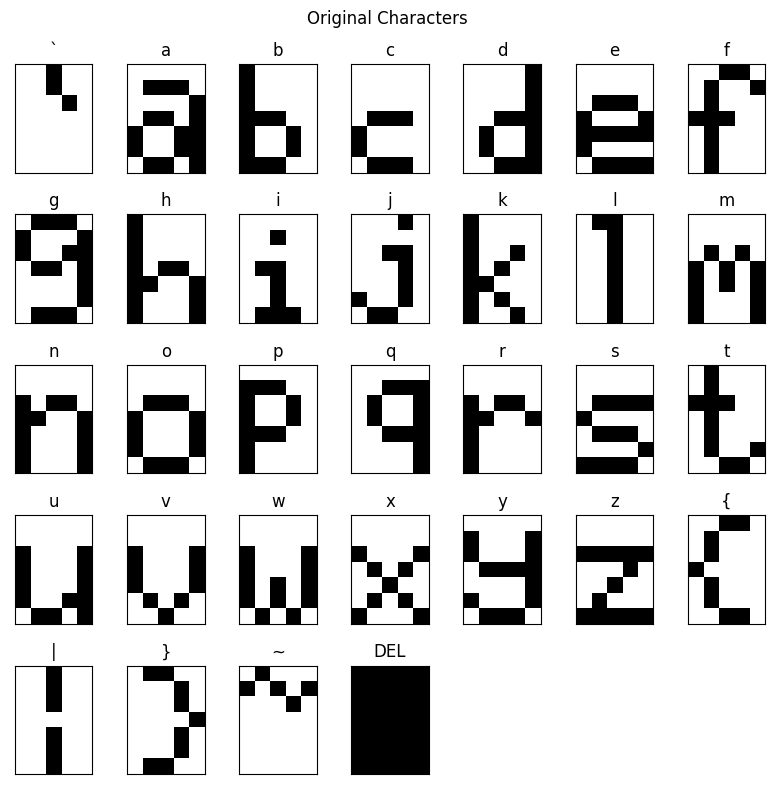

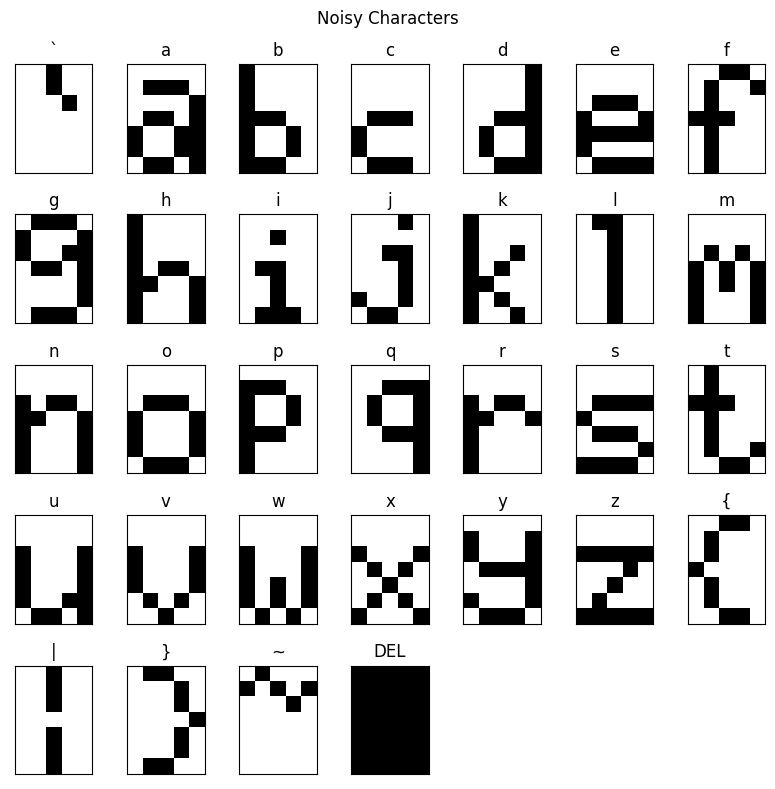

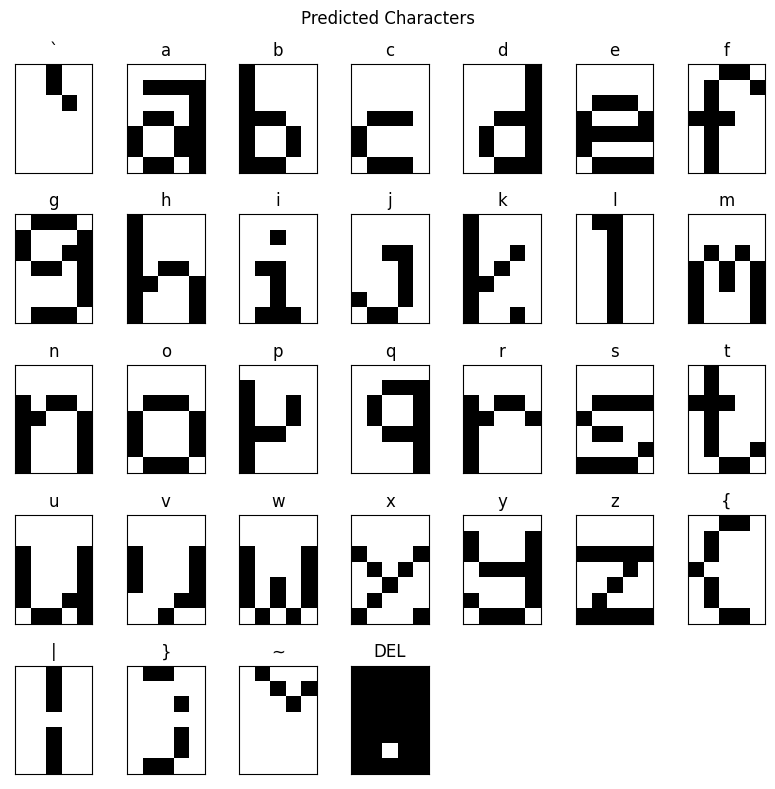

In [11]:
characters = list(bitmapDict.keys())

input_matrix_list = []
output_matrix_list = []
noisy_matrix_list = []

correct_predictions = 0

# Function to convert bitmap data to matrix
def convert_to_matrix(data, dataset):
    bitmap = [dataset[i][0] for i in range(len(dataset))]
    return bitmap_as_matrix(bitmap)

# Function to generate the output matrix from the autoencoder
def generate_output_matrix(autoencoder, dataset):
    outputs, _ = predict_with_layer_value(autoencoder, dataset, 6)
    output_bitmap = [round(abs(output[0])) for output in outputs]
    return bitmap_as_matrix(output_bitmap)

for c, char in enumerate(characters):
    input_matrix_list.append(convert_to_matrix(dataset[c], dataset[c]))
    noisy_matrix_list.append(convert_to_matrix(dataset[c], dataset[c]))
    output_matrix = generate_output_matrix(autoencoder, dataset[c])
    output_matrix_list.append(output_matrix)

    if compare_matrixes(input_matrix_list[-1], output_matrix) > 32:  # 32 pixels out of 35 match
        correct_predictions += 1

    # Uncomment if you want to plot each character's matrices
    # plot_bitmap_matrix_with_noise(input_matrix_list[-1], noisy_matrix_list[-1], output_matrix, char)

print("Correct Predictions: ", correct_predictions)
print("Accuracy: ", correct_predictions / len(characters))

plot_bitmap_matrix_2(input_matrix_list, characters, "Original Characters")
plot_bitmap_matrix_2(noisy_matrix_list, characters, "Noisy Characters")
plot_bitmap_matrix_2(output_matrix_list, characters, "Predicted Characters")
